<a href="https://colab.research.google.com/github/brindanaveen0109/FlickPicks/blob/main/flickpicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE DATA FILES REQUIRED**


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats

In [ ]:
movies = pd.read_csv("/content/datasets/movies.csv")
ratings = pd.read_csv("/content/datasets/ratings.csv")

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
20670,106887,True Heart (1997),Adventure|Children|Drama
20671,106889,Tim's Vermeer (2013),Documentary
20672,106892,After Tiller (2013),Documentary
20673,106895,Lovecraft: Fear of the Unknown (2008),Documentary


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
...,...,...,...,...
43144,345,4865,5.0,1.004575e+09
43145,345,4874,5.0,1.004575e+09
43146,345,4878,5.0,1.013922e+09
43147,345,4881,5.0,1.010728e+09


In [ ]:
mergedDataset = pd.merge(movies, ratings, on = "movieId")

In [ ]:
mergedDataset

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08
...,...,...,...,...,...,...
41601,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,243,3.0,1.464280e+09
41602,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,301,3.0,1.484677e+09
41603,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,302,4.5,1.470858e+09
41604,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,321,3.5,1.540496e+09


# **DATA PREPROCESSING**

In [ ]:
mergedDataset.describe()

,movieId,userId,rating,timestamp
count,41606.000000,41606.000000,41606.000000,4.160500e+04
mean,12855.002932,166.582176,3.581034,1.167441e+09
std,24855.862139,97.898881,1.061712,2.241494e+08
min,1.000000,1.000000,0.500000,8.281634e+08
25%,920.000000,80.000000,3.000000,9.787399e+08
50%,2391.000000,172.000000,4.000000,1.131660e+09
75%,5810.000000,243.000000,4.000000,1.375907e+09
max,106782.000000,345.000000,5.000000,1.574195e+09


In [ ]:
mergedDataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08


In [ ]:
mergedDataset.tail()

,movieId,title,genres,userId,rating,timestamp
41601,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,243,3.0,1.464280e+09
41602,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,301,3.0,1.484677e+09
41603,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,302,4.5,1.470858e+09
41604,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,321,3.5,1.540496e+09
41605,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,335,4.0,1.562165e+09


In [ ]:
mergedDataset.isna().sum()

movieId       0
title        99
genres       99
userId        0
rating        0
timestamp     1
dtype: int64

In [ ]:
mergedDataset.isnull().sum()

movieId       0
title        99
genres       99
userId        0
rating        0
timestamp     1
dtype: int64

In [ ]:
mergedDataset.drop('timestamp', axis = 1, inplace = True)

In [ ]:
mergedDataset

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
41601,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,243,3.0
41602,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,301,3.0
41603,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,302,4.5
41604,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,321,3.5


In [ ]:
mergedDataset[mergedDataset['rating'] < 0]

,movieId,title,genres,userId,rating


**we filter the movies and keep only those with over 100 ratings for the analysis.**

---



 For that, we group the movies by title, count the number of ratings, and keep only the movies with greater than 100 ratings

In [ ]:
#Aggregate by movie
agg_ratings = mergedDataset.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>50]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 123 to 5466
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              124 non-null    object 
 1   mean_rating        124 non-null    float64
 2   number_of_ratings  124 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
# Check popular movies
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
1856,Forrest Gump (1994),4.058989,178
3984,Pulp Fiction (1994),4.186391,169
4423,"Shawshank Redemption, The (1994)",4.496951,164
4475,"Silence of the Lambs, The (1991)",4.303333,150
3171,"Matrix, The (1999)",4.183673,147


# **VISUALISATION/EDA**

In [ ]:
import matplotlib.pyplot as plt

**USING HISTOGRAM TO PLOT MOVIE RATINGS AND NUMBER OF MOVIES BASED ON DISTIBUTION OF RATINGS**

Text(0.5, 1.0, 'Distribution of movie ratings')

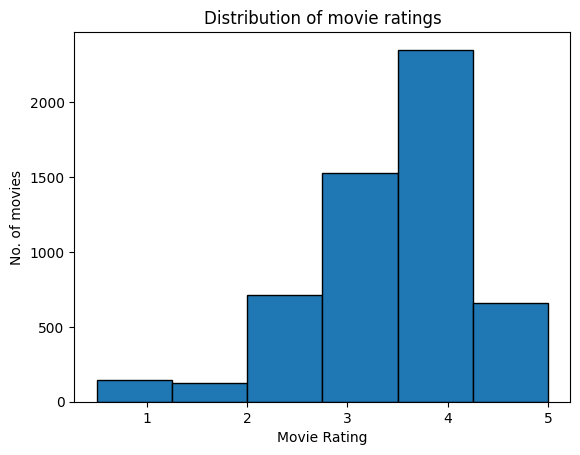

In [ ]:
movie_ratings = mergedDataset.groupby("movieId")["rating"].mean()
plt.hist(movie_ratings, bins = 6, edgecolor = "black")
plt.xlabel("Movie Rating")
plt.ylabel("No. of movies")
plt.title("Distribution of movie ratings")

**USING SCATTERPLOT FOR USER ANALYSIS**

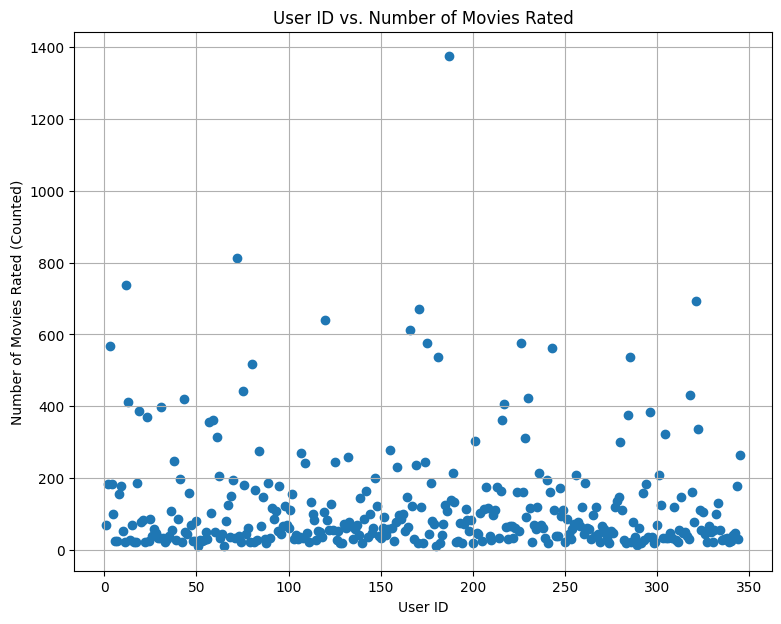

In [ ]:
user_movie_count = mergedDataset.groupby('userId')['movieId'].count()
plt.figure(figsize=(9, 7))
plt.scatter(user_movie_count.index, user_movie_count.values)
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated (Counted)')
plt.title('User ID vs. Number of Movies Rated')
plt.grid(True)
plt.show()

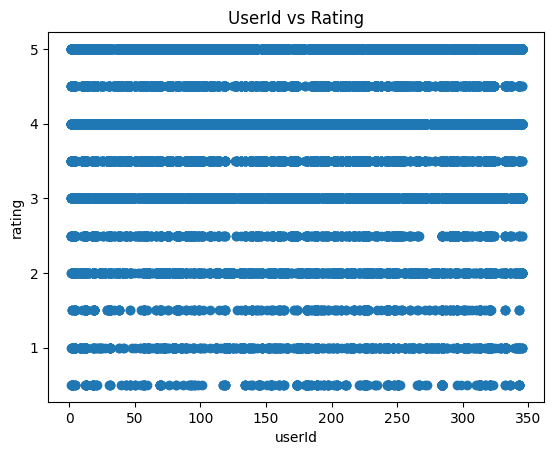

In [ ]:
plt.scatter(mergedDataset['userId'], mergedDataset['rating'])
plt.xlabel('userId')
plt.ylabel('rating')
plt.title('UserId vs Rating')
plt.show()

In [ ]:
mergedDataset['movieId'].value_counts()

movieId
1        198
356      178
296      169
318      164
593      150
        ... 
26181      1
26183      1
26184      1
26198      1
4812       1
Name: count, Length: 5527, dtype: int64

In [ ]:
print(mergedDataset['rating'].unique().tolist())
print(mergedDataset['userId'].nunique())
print(mergedDataset['movieId'].nunique())
print(mergedDataset['rating'].value_counts())

[3.5, 4.0, 3.0, 5.0, 2.0, 4.5, 2.5, 1.0, 1.5, 0.5]
345
5527
rating
4.0    11747
3.0     8230
5.0     6688
3.5     4444
4.5     3578
2.0     2769
2.5     1662
1.0     1281
1.5      642
0.5      565
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

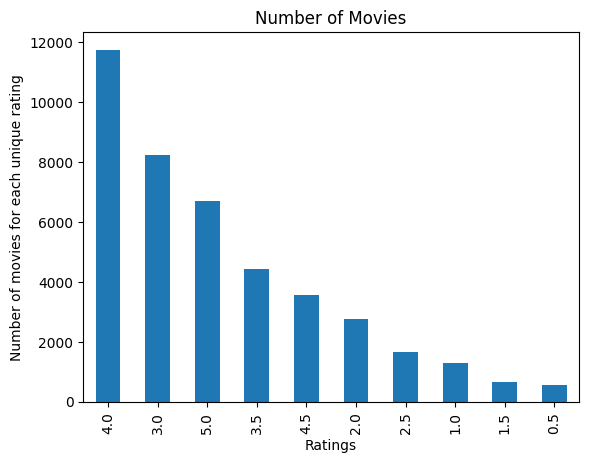

In [ ]:
mergedDataset['rating'].value_counts().plot(kind='bar', title='Number of Movies')
plt.xlabel("Ratings")
plt.ylabel("Number of movies for each unique rating")
plt.show

In [ ]:
'''To keep only the 124 movies with more than 50 ratings,
we need to join the movie with the user-rating level dataframe'''
df_GT100 = pd.merge(mergedDataset, agg_ratings_GT100[['title']], on='title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9637 non-null   int64  
 1   title    9637 non-null   object 
 2   genres   9637 non-null   object 
 3   userId   9637 non-null   int64  
 4   rating   9637 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 376.6+ KB


In [ ]:
# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 344 unique users
The ratings dataset has 124 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


# **CREATE A USER MOVIE MATRIX**

In [ ]:
# Create user-item matrix
user_item_matrix = df_GT100.pivot_table(index = 'userId', columns = 'title', values = 'rating')
user_item_matrix.head()

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),Apollo 13 (1995),Babe (1995),...,Toy Story (1995),Trainspotting (1996),True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,3.5,NaN,1.0,4.5,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,4.0,4.0,NaN,NaN,5.0,5.0,NaN,NaN,...,4.0,5.0,NaN,4.0,4.5,NaN,5.0,NaN,NaN,4.0
4,NaN,NaN,2.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
5,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,4.0,5.0,NaN,NaN,5.0,3.0,5.0,NaN,3.0,NaN


# **DATA NORMALISATION**

In [ ]:
normalised_matrix = user_item_matrix.subtract(user_item_matrix.mean(axis = 1), axis = 'rows')
normalised_matrix

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),Apollo 13 (1995),Babe (1995),...,Toy Story (1995),Trainspotting (1996),True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,0.166667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2.224490,NaN,NaN,NaN,NaN,NaN,NaN,-0.224490,NaN,...,-0.724490,NaN,-3.224490,0.275510,NaN,NaN,NaN,NaN,NaN,0.775510
3,NaN,NaN,-0.213115,-0.213115,NaN,NaN,0.786885,0.786885,NaN,NaN,...,-0.213115,0.786885,NaN,-0.213115,0.286885,NaN,0.786885,NaN,NaN,-0.213115
4,NaN,NaN,-1.289474,-0.289474,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.789474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.289474
5,-0.027778,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN,0.972222,NaN,...,-0.027778,0.972222,NaN,NaN,0.972222,-1.027778,0.972222,NaN,-1.027778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.095238,-0.904762,NaN,NaN,NaN,NaN,NaN,NaN,0.095238,NaN,...,0.095238,NaN,1.095238,NaN,1.095238,0.095238,NaN,NaN,NaN,NaN
342,NaN,NaN,0.857143,NaN,-1.142857,NaN,NaN,NaN,NaN,NaN,...,NaN,0.857143,NaN,NaN,NaN,NaN,0.857143,NaN,NaN,NaN
343,NaN,NaN,0.952381,NaN,0.952381,0.952381,NaN,NaN,NaN,NaN,...,NaN,-0.047619,NaN,NaN,-0.047619,NaN,0.952381,NaN,NaN,NaN


# **IDENTIFYING SIMILAR USERS**

**Using cosine similarity**

In [ ]:
# Calculate user similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(normalised_matrix.fillna(0))
user_similarity

array([[ 1.        , -0.08450205,  0.17671533, ...,  0.116689  ,
         0.23262105,  0.05381756],
       [-0.08450205,  1.        ,  0.09388699, ...,  0.05809109,
        -0.09299366, -0.06802654],
       [ 0.17671533,  0.09388699,  1.        , ...,  0.11532847,
         0.1676305 ,  0.0256929 ],
       ...,
       [ 0.116689  ,  0.05809109,  0.11532847, ...,  1.        ,
         0.12546239,  0.03729366],
       [ 0.23262105, -0.09299366,  0.1676305 , ...,  0.12546239,
         1.        ,  0.03526494],
       [ 0.05381756, -0.06802654,  0.0256929 , ...,  0.03729366,
         0.03526494,  1.        ]])

In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.
